In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/facial/training.csv')

In [3]:
df.shape

(7049, 31)

## 얼굴 기울기 찾기

### 이미지 96x96으로 바꾸고 x,y 데이터 나눔

In [4]:
from joblib import Parallel, delayed

def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype = np.uint8).reshape(96,96)

with Parallel(n_jobs = 10, verbose = 1, prefer = 'threads') as ex:
    x = ex(delayed(format_img)(e) for e in df.Image)

x = np.stack(x)[:,:,:,None]
print(x.shape)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.4s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    6.9s
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:    9.1s
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:   11.5s
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:   15.4s
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:   18.9s


(7049, 96, 96, 1)


[Parallel(n_jobs=10)]: Done 7049 out of 7049 | elapsed:   22.0s finished


In [5]:
y = df.iloc[:,:-1].values
y.shape

(7049, 30)

In [6]:
x.shape

(7049, 96, 96, 1)

814


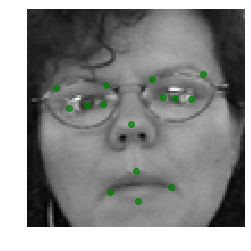

In [7]:
# 이미지 보여주는 function
def show(x, y=None):

    plt.imshow(x[:,:,0], 'gray')
    if y is not None:
        # vertical stack 
        points = np.stack(np.split(y, 15, axis = 0),axis =0).T
        plt.plot(points[0], points[1],'o', color = 'green', alpha = 0.7 )
    plt.axis('off')
sample_idx = np.random.choice(len(x))
show(x[sample_idx], y[sample_idx])
print(sample_idx)

In [8]:
df.loc[6720,:]

left_eye_center_x                                                      69.7602
left_eye_center_y                                                      39.8065
right_eye_center_x                                                     37.4787
right_eye_center_y                                                     37.3233
left_eye_inner_corner_x                                                    NaN
left_eye_inner_corner_y                                                    NaN
left_eye_outer_corner_x                                                    NaN
left_eye_outer_corner_y                                                    NaN
right_eye_inner_corner_x                                                   NaN
right_eye_inner_corner_y                                                   NaN
right_eye_outer_corner_x                                                   NaN
right_eye_outer_corner_y                                                   NaN
left_eyebrow_inner_end_x                            

### y 데이터 (눈, 눈썹, 코, 입)를 x,y좌표로 합친 array로

In [9]:
df.iloc[:,:-1].head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774


In [10]:
def xy_to_list(data):
    xy_list = []
    for d in data:
        xy_list.append(np.split(d, 15))
    return xy_list

In [11]:
xy_list = xy_to_list(y)
print("len(xy_list) : {}\nlen(xy_list[0]) : {}\nxy_list[0][0].shape : {} "
      .format(len(xy_list),len(xy_list[0]), xy_list[0][0].shape ))
display(xy_list[0])

len(xy_list) : 7049
len(xy_list[0]) : 15
xy_list[0][0].shape : (2,) 


[array([66.03356391, 39.00227368]),
 array([30.22700752, 36.4216782 ]),
 array([59.58207519, 39.64742256]),
 array([73.13034586, 39.96999699]),
 array([36.35657143, 37.3894015 ]),
 array([23.45287218, 37.3894015 ]),
 array([56.95326316, 29.03364812]),
 array([80.22712782, 32.22813835]),
 array([40.22760902, 29.0023218 ]),
 array([16.35637895, 29.64747068]),
 array([44.42057143, 57.06680301]),
 array([61.19530827, 79.97016541]),
 array([28.61449624, 77.38899248]),
 array([43.3126015 , 72.93545865]),
 array([43.13070677, 84.48577444])]

In [12]:
xy_list[0]

[array([66.03356391, 39.00227368]),
 array([30.22700752, 36.4216782 ]),
 array([59.58207519, 39.64742256]),
 array([73.13034586, 39.96999699]),
 array([36.35657143, 37.3894015 ]),
 array([23.45287218, 37.3894015 ]),
 array([56.95326316, 29.03364812]),
 array([80.22712782, 32.22813835]),
 array([40.22760902, 29.0023218 ]),
 array([16.35637895, 29.64747068]),
 array([44.42057143, 57.06680301]),
 array([61.19530827, 79.97016541]),
 array([28.61449624, 77.38899248]),
 array([43.3126015 , 72.93545865]),
 array([43.13070677, 84.48577444])]

In [13]:
xy_list[0][10]

array([44.42057143, 57.06680301])

In [14]:
df.loc[0,:]

left_eye_center_x                                                      66.0336
left_eye_center_y                                                      39.0023
right_eye_center_x                                                      30.227
right_eye_center_y                                                     36.4217
left_eye_inner_corner_x                                                59.5821
left_eye_inner_corner_y                                                39.6474
left_eye_outer_corner_x                                                73.1303
left_eye_outer_corner_y                                                  39.97
right_eye_inner_corner_x                                               36.3566
right_eye_inner_corner_y                                               37.3894
right_eye_outer_corner_x                                               23.4529
right_eye_outer_corner_y                                               37.3894
left_eyebrow_inner_end_x                            

### 왼쪽 눈 중앙과 오른쪽 눈 중앙의 중점과 기울기를 구함

In [15]:
import math 
# 두 점간의 기울기와 중점 구함
def get_gradient_middle(feature1, feature2):
    # 사진은 좌우 대칭이기 때문에 왼쪽 - 오른쪽
    delta_x = (feature2 - feature1)[0]
    delta_y = (feature2 - feature1)[1]
    gradient = delta_y / delta_x
#   distance = math.sqrt(math.pow(delta_x,2) + math.pow(delta_y,2))
    middle_point = get_middlepoint(feature1, feature2)
    return gradient, middle_point
# 두 점의 중점 구하기
def get_middlepoint(feature1, feature2):
    return (feature1 + feature2)/2

# 기울기와 좌표값으로 y절편 구하기
def get_b(gradient, point):
    return point[1] - gradient*point[0]

# 어떤 직선의 중점을 지나고 직교하는 직선 구하기
def get_ppline(gradient):
    if gradient == 0:
        perpen_gradient = 0
    else :
        perpen_gradient = (-1/gradient)
    return np.float64(perpen_gradient)

# 눈 사이 직선에 직교하고 중점을 지나는 직선과 코 사이의 x 변화량
def get_nose_ppline_delta_x(middle_point, gradient, nose_point):
    perpen_gradient = get_ppline(gradient)
    if gradient == 0:
        perpen_line_x_point = middle_point[0]
    else:
        b = get_b(perpen_gradient, middle_point)
        perpen_line_x_point = (nose_point[1] - b)/perpen_gradient
    # b = y - ax 
    # y = ax  + b 
    # x = (y-b)/a
    return abs(nose_point[0] - perpen_line_x_point)

In [16]:
# 직교하는 직선들을 이미지에 표시
def show_ppline(x, y=None, line=None):
    # x,y 범위 지정
    plt.xlim(96,0)
    plt.ylim(96,0)
    plt.imshow(x[:,:,0], 'gray')
    if y is not None:
        # vertical stack 
        points = np.stack(np.split(y, 15, axis = 0),axis =0).T
        plt.plot(points[0], points[1],'o', color = 'green', alpha = 0.7 )
    if line is not None:
        x = range(0,96)
        # pipline[0] 은 gradient
        # pipline[1] 은 (x,y)
        # y = ax + b
        plt.plot(x, line[0]*x + get_b(line[0], line[1]), 'r', label='ppline', alpha = 0.7)
        x = range(0,96)
        ppline_gradient = get_ppline(line[0])
        if ppline_gradient == 0:
            plt.plot(np.array([line[1][0]]*96), x, 'r', label='ppline', alpha = 0.7)
        else:
            plt.plot(x, ppline_gradient*x + get_b(ppline_gradient, line[1]), 'r', label='ppline', alpha = 0.7)

    plt.axis('off')

In [17]:
print(xy_list[0][0])
print(xy_list[0][1])

[66.03356391 39.00227368]
[30.22700752 36.4216782 ]


In [18]:
# 두 점 간의 기울기와 중점을 구함
eye_gd_dis = []
for i in range(len(xy_list)):
    eye_gd_dis.append(get_gradient_middle(xy_list[i][1],xy_list[i][0]))
print(len(eye_gd_dis))
print(eye_gd_dis[0])

7049
(0.07207047392439651, array([48.13028571, 37.71197594]))


In [19]:
### xy_list[:][0] 은 왼쪽 눈 center
### xy_list[:][1] 은 오른쪽 눈 center
### xy_list[:][10] 은 코 

In [20]:
gd_md_delta_list = []
for i in range(len(xy_list)):
    # 기울기와 중점
    gd_md_list = list(get_gradient_middle(xy_list[i][1], xy_list[i][0]))
    # 코와 눈 사이 직선간의 거리
    gd_md_list.append(get_nose_ppline_delta_x(gd_md_list[1], gd_md_list[0], xy_list[i][10]))
    gd_md_delta_list.append(gd_md_list)
    gd_md_list.append(i)
print(len(gd_md_delta_list))
print(gd_md_delta_list[0])


7049
[0.07207047392439651, array([48.13028571, 37.71197594]), 2.3148027262097415, 0]


In [21]:
# 눈 사이 중점
print(gd_md_delta_list[5][1])
# 코의 위치
print(xy_list[5][10])

[49.43214953 38.76605607]
[52.46848598 58.8       ]


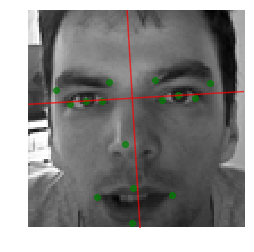

In [22]:
show_ppline(x[5], y[5], gd_md_delta_list[5])

In [23]:
test_list = gd_md_delta_list[:]

In [24]:
test_list[0][2]

2.3148027262097415

In [25]:
test_list.sort(key = lambda x:x[2], reverse = True)

In [26]:
display(test_list[1])

[0.1289572013203705,
 array([48.47271837, 37.88419215]),
 15.103981116811326,
 1776]

In [27]:
gd_md_delta_list[0]

[0.07207047392439651, array([48.13028571, 37.71197594]), 2.3148027262097415, 0]

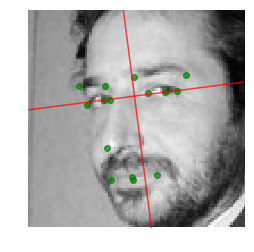

In [28]:
show_ppline(x[1776], y[1776], test_list[1])

In [29]:
# sample_idx = np.random.choice(len(x))
# show(x[sample_idx], y[sample_idx])

## 결측 값 채우기

### 결측 값을 채우는 학습모델 만들기
- feature map
    - 왼쪽 눈 위치
    - 오른쪽 눈 위치
    - 코 위치
    - 아랫입술 위치
    - 추가해야할 feature
        - 눈사이의 기울기
        - 왼쪽 눈과 코사이의 기울기
        - 오른쪽 눈과 코사이의 기울기
        - 입술에서 코까지의 거리
        - 각 눈의 점과 코의 점을 잇는 삼각형 넓이

In [645]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed
import math

In [646]:
df = pd.read_csv('../data/facial/training.csv')
df.shape

(7049, 31)

#### 결측값 없는 온전한 데이터 전처리

In [647]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/facial/training.csv')
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(7049, 31)
(2140, 31)


In [648]:
feature_list = [0,1,2,3,20,21,28,29]
x_data = df.iloc[:,feature_list]
print("x_data.shape : {}".format(x_data.shape))
for c in x_data.columns:
    print(c)

x_data.shape : (2140, 8)
left_eye_center_x
left_eye_center_y
right_eye_center_x
right_eye_center_y
nose_tip_x
nose_tip_y
mouth_center_bottom_lip_x
mouth_center_bottom_lip_y


In [649]:
y_data = df.drop(x_data.columns ,axis = 1)
y_data.drop('Image', axis = 1, inplace = True)
print("y_data.sahpe : {}".format(y_data.shape))
for c in y_data.columns:
    print(c)

y_data.sahpe : (2140, 22)
left_eye_inner_corner_x
left_eye_inner_corner_y
left_eye_outer_corner_x
left_eye_outer_corner_y
right_eye_inner_corner_x
right_eye_inner_corner_y
right_eye_outer_corner_x
right_eye_outer_corner_y
left_eyebrow_inner_end_x
left_eyebrow_inner_end_y
left_eyebrow_outer_end_x
left_eyebrow_outer_end_y
right_eyebrow_inner_end_x
right_eyebrow_inner_end_y
right_eyebrow_outer_end_x
right_eyebrow_outer_end_y
mouth_left_corner_x
mouth_left_corner_y
mouth_right_corner_x
mouth_right_corner_y
mouth_center_top_lip_x
mouth_center_top_lip_y


#### feautre map을 추가시키기
- 눈 사이 기울기
- 왼쪽눈과 코 사이의 기울기
- 오른쪽눈과 코 사이의 기울기
- 코와 입 사이의 거리
- 각 눈의 점과 코의 점을 잇는 삼각형 넓이

In [650]:
x_data_split = np.split(x_data.values, 4, axis = 1)
# 0 : 왼쪽 눈 1 : 오른쪽 눈 2 : 코 3 : 입술 아래
x_data_split[0].shape

(2140, 2)

In [651]:
x_data.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,44.420571,57.066803,43.130707,84.485774


In [652]:
def get_gradient(feature1, feature2):
    x_delta = (feature1-feature2)[:,0]
    y_delta = (feature1-feature2)[:,1]
    return y_delta / x_delta

def get_distnace(feature1, feature2):
    x_delta = (feature1-feature2)[:,0]
    y_delta = (feature1-feature2)[:,1]
    return pow(2, (x_delta**2 + y_delta**2))

In [653]:
# 0 : 왼쪽 눈 1 : 오른쪽 눈 2 : 코 3 : 입술 아래
le2re_gradient = get_gradient(x_data_split[0], x_data_split[1]).reshape(-1, 1)
le2n_gradient = get_gradient(x_data_split[0], x_data_split[2]).reshape(-1, 1)
re2ne_gradient = get_gradient(x_data_split[1], x_data_split[2]).reshape(-1, 1)
n2bm_distnace = get_distnace(x_data_split[2], x_data_split[3]).reshape(-1, 1)

print(le2re_gradient.shape)
print(le2n_gradient.shape)
print(re2ne_gradient.shape)
print(n2bm_distnace.shape)

for d in [le2re_gradient, le2n_gradient,re2ne_gradient,n2bm_distnace]:
    x_data = np.append(x_data, d, axis = 1)
print(x_data.shape)

(2140, 1)
(2140, 1)
(2140, 1)
(2140, 1)
(2140, 12)


C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':


In [654]:
from joblib import Parallel, delayed

def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype = np.uint8).reshape(96,96)

with Parallel(n_jobs = 10, verbose = 1, prefer = 'threads') as ex:
    img_data = ex(delayed(format_img)(e) for e in df.Image)

img_data = np.stack(img_data)[:,:,:,None]
print(img_data.shape)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.3s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.7s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.2s


(2140, 96, 96, 1)


[Parallel(n_jobs=10)]: Done 2140 out of 2140 | elapsed:    6.3s finished


#### train / test split

In [698]:
from sklearn.model_selection import train_test_split

# random_state는 난수시드
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.2, random_state = 42)
img_train, img_test = train_test_split(img_data,test_size = 0.2, random_state = 42)
print("x_train.shape :{}\nx_val.shape : {}".format(x_train.shape, x_test.shape))
print("y_train.shape :{}\ny_val.shape : {}".format(y_train.shape, y_test.shape))
print("img_train.shape :{}\nimg_val.shape : {}".format(img_train.shape, img_test.shape))

x_train.shape :(1712, 12)
x_val.shape : (428, 12)
y_train.shape :(1712, 22)
y_val.shape : (428, 22)
img_train.shape :(1712, 96, 96, 1)
img_val.shape : (428, 96, 96, 1)


#### x,y좌표로 변환

In [663]:
def convert_xy(data, feature_size):
    data = data[:,:feature_size]
    # (batch, feature_size/2 , 2-D shape)
    return np.stack(np.split(test, feature_size/2, axis = 1), axis = 1)
    

In [664]:
test = convert_xy(x_train, 8)
test.shape
# test[:, 참조하고싶은 colum, :] 와 같은 형태로 indexing해서 사용

(1712, 4, 1, 2)

#### 이미지 보여주는 function

129


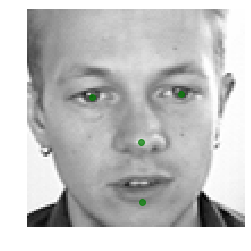

In [713]:
# 이미지 보여주는 function
def show(x, y=None, feature_size = None):

    plt.imshow(x[:,:,0], 'gray')
    if y is not None:
        # vertical stack 
        y = y[:feature_size]
        points = np.stack(np.split(y, int(feature_size/2), axis = 0),axis =0).T
        plt.plot(points[0], points[1],'o', color = 'green', alpha = 0.7 )
    plt.axis('off')
sample_idx = np.random.choice(len(x_data))
show(img_data[sample_idx], x_data[sample_idx], 8)
print(sample_idx)

#### NN model 만들기

In [714]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPool2D
from keras.optimizers import Adam
from keras import regularizers
import numpy as np
from keras.models import load_model
from keras.callbacks import CSVLogger
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf

Using TensorFlow backend.


In [ ]:
class NNmodel:
    def __init__(self, x_train, x_test, y_train, y_test, epoch):
        
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.epoch = epoch
        self.build_model()
        
    def build_model(self):
        self.model = Sequential()
        self.model.add(Dense(128, input_shape = (12,), kernel_initializer='he_normal',
                             use_bias=True, bias_initializer='he_normal',
                             kernel_regularizer=regularizers.l2(0.01)))
        self.model.add(BatchNormalization(axis=-1))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(256, kernel_initializer='he_normal',
                             use_bias=True, bias_initializer='he_normal',
                             kernel_regularizer=regularizers.l2(0.01)))
        self.model.add(BatchNormalization(axis=-1))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(512, kernel_initializer='he_normal',
                             use_bias=True, bias_initializer='he_normal',
                             kernel_regularizer=regularizers.l2(0.01)))
        self.model.add(BatchNormalization(axis=-1))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(22, kernel_initializer='he_normal',
                             use_bias=True, bias_initializer='he_normal',
                             kernel_regularizer=regularizers.l2(0.01)))
        self.model.compile(optimizer = Adam(0.0001), loss='mse', metrics = ['mae'])
        print(self.model.summary())
        print(self.model.input, self.model.output)
    def training_model(self):
        csv_logger = CSVLogger('fillnan_1.log', separator=',', append=True)
        log = self.model.fit(self.x_train, self.y_train, epochs=self.epoch, batch_size=50, validation_data=[self.x_test, self.y_test], callbacks=[csv_logger])
        self.model.save('fillnan_1.h5')



In [ ]:
nnmodel1 = NNmodel(x_train, x_test, y_train, y_test, 300)
nnmodel1.training_model()

### 눈 코 입도 있는 이미지만 살리기

In [31]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [33]:
notnull_lefteye = df['left_eye_center_x'].notnull().values
notnull_righteye = df['right_eye_center_x'].notnull().values
notnull_mouth = df['mouth_center_bottom_lip_y'].notnull().values
bool_index = notnull_lefteye*notnull_righteye*notnull_mouth

df = df[bool_index]

In [ ]:
# 순서가 어긋날 수 있으니 다시 DataFrame을 생성해 index가 초기화될 수 있게한다
new_df = pd.DataFrame(new_df.values, columns= new_df.columns)

In [ ]:
new_df.shape

In [ ]:
y_label = new_df.iloc[:,:-1]
x_data = new_df.iloc[:,-1]
print(y_label.shape)
print(x_data.shape)